<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
# check the iowa file location for your computer 
iowa_file = '~/Desktop/DSI-SF-5-Working/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.shape

(270955, 18)

In [4]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [5]:
iowa.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [7]:
iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [8]:
#date column with values formatted as strings
iowa['Date'].unique()

array(['11/04/2015', '03/02/2016', '02/11/2016', '02/03/2016',
       '08/18/2015', '04/20/2015', '08/05/2015', '06/25/2015',
       '01/04/2016', '11/10/2015', '09/28/2015', '10/28/2015',
       '01/22/2015', '02/29/2016', '06/10/2015', '02/25/2016',
       '12/29/2015', '12/26/2015', '03/04/2015', '01/16/2015',
       '01/13/2015', '03/24/2015', '11/12/2015', '03/14/2016',
       '02/03/2015', '11/23/2015', '04/21/2015', '12/01/2015',
       '01/14/2015', '04/01/2015', '01/12/2015', '06/29/2015',
       '04/02/2015', '06/03/2015', '01/27/2016', '03/07/2016',
       '03/31/2015', '02/23/2015', '10/21/2015', '01/28/2016',
       '04/14/2015', '08/06/2015', '01/26/2015', '06/11/2015',
       '04/28/2015', '01/28/2015', '07/28/2015', '03/10/2015',
       '06/01/2015', '02/23/2016', '09/16/2015', '07/09/2015',
       '03/23/2016', '11/30/2015', '04/07/2015', '03/16/2015',
       '11/24/2015', '08/24/2015', '11/11/2015', '12/09/2015',
       '03/29/2016', '03/19/2015', '10/26/2015', '12/16

In [9]:
#column with dollar values formatted as strings
iowa["Sale (Dollars)"].unique()

array(['$81.00', '$41.26', '$453.36', ..., '$19.02', '$2937.66', '$121.80'], dtype=object)

In [10]:
#column with dollar values formatted as strings
iowa["State Bottle Retail"].unique()

array(['$6.75', '$20.63', '$18.89', ..., '$20.64', '$9.51', '$13.25'], dtype=object)

In [11]:
#column with dollar values formatted as strings
iowa["State Bottle Cost"].unique()

array(['$4.50', '$13.75', '$12.59', ..., '$22.41', '$13.76', '$6.34'], dtype=object)

In [12]:
#column with missing values and with values formatted as floats, instead of integers
iowa["County Number"].unique()

array([  9.,  82.,   7.,  85.,  99.,  57.,  90.,  17.,  77.,   6.,  62.,
        56.,  52.,  50.,  86.,  84.,  30.,  78.,  91.,  94.,   8.,  49.,
        14.,  40.,  97.,  92.,  34.,  28.,  71.,  11.,  38.,  31.,   1.,
        24.,  44.,  39.,  96.,  21.,  70.,  87.,  43.,  42.,  55.,  25.,
        27.,  23.,  12.,  29.,  13.,  33.,  53.,  nan,  41.,  48.,  45.,
         4.,  51.,  32.,  64.,  73.,  16.,  22.,  81.,  67.,   3.,  95.,
        79.,  63.,  10.,  35.,  18.,  46.,  37.,  54.,  75.,  83.,  20.,
        74.,  15.,  60.,  76.,  47.,  88.,  36.,  69.,  58.,  66.,  65.,
        61.,  26.,  59.,   5.,  93.,  72.,  19.,  89.,  98.,  68.,   2.,
        80.])

In [13]:
#column with missing values and with values formatted as floats, instead of integers
iowa["Category"].unique()

array([ 1051100.,  1011100.,  1011200.,  1071100.,  1031080.,  1041100.,
        1051010.,  1012100.,  1032080.,  1081315.,  1011250.,  1081300.,
        1031200.,  1031100.,  1081700.,  1022100.,  1011300.,  1081600.,
        1081900.,  1081305.,  1051120.,  1082900.,  1042100.,  1081370.,
        1051110.,  1012210.,  1062200.,  1062310.,  1081200.,  1012200.,
        1032200.,  1012300.,  1062300.,  1052010.,  1081350.,  1081335.,
        1081400.,  1081010.,  1081390.,  1011500.,  1081330.,  1051150.,
        1081355.,  1101100.,  1062100.,  1062050.,  1081030.,  1081340.,
        1701100.,  1081317.,  1031090.,  1022200.,  1052100.,  1081015.,
        1081312.,  1081020.,  1081210.,  1081500.,  1051140.,  1041150.,
        1081380.,  1082100.,  1081250.,  1081230.,  1081365.,  1081240.,
        1032100.,  1031110.,  1041200.,  1081220.,  1012400.,  1011400.,
        1091100.,       nan,  1062500.,  1091300.,  1082200.,  1011600.,
        1501100.,  1062400.,  1011700.,  1092100., 

In [14]:
#corrupt zip code value ('712-2')
iowa['Zip Code'].unique()

array(['50674', '52807', '50613', '50010', '50421', '52402', '52501',
       '50428', '50035', '52332', '50265', '52577', '52806', '52656',
       '52241', '50703', '50208', '52342', '51250', '50401', '51351',
       '52246', '51501', '50111', '52245', '52632', '50125', '50501',
       '50311', '50317', '50124', '52804', '50320', '50651', '50129',
       '50021', '52224', '50533', '50212', '52060', '51401', '50595',
       '51104', '52404', '52353', '50616', '52057', '51201', '50009',
       '50588', '52802', '51503', '50638', '51106', '51360', '52001',
       '50250', '51461', '52641', '52303', '50115', '52144', '51301',
       '52761', '50851', '51555', '52240', '50126', '50511', '50310',
       '50263', '50314', '52753', '50701', '50140', '52732', '50665',
       '52601', '712-2', '51041', '51455', '51453', '52405', '52302',
       '50023', '50131', '50662', '52310', '50423', '52208', '52361',
       '50201', '50003', '50315', '52136', '52544', '52556', '51334',
       '50158', '527

# 3.2 Clean the columns

In [15]:
#convert Date column to datetime type
iowa['Date'] = pd.to_datetime(pd.Series(iowa['Date']), format="%m/%d/%Y")

In [16]:
#change string dollar values to floats
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].replace('[\$,]', '', regex=True).astype(float)

In [17]:
#change string dollar values to floats
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].replace('[\$,]', '', regex=True).astype(float)

In [18]:
#change string dollar values to floats
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].replace('[\$,]', '', regex=True).astype(float)

In [19]:
#change float values to integers, first replacing NaN values to 0.0's
iowa['County Number'] = iowa['County Number'].fillna(0.0).astype(int)

In [20]:
#change float values to integers, first replacing NaN values to 0.0's
iowa['Category'] = iowa['Category'].fillna(0.0).astype(int)

In [21]:
#remove corrupt zip code value
iowa['Zip Code'] = iowa['Zip Code'].replace('712-2',None)

In [22]:
iowa['Zip Code'].unique()

array(['50674', '52807', '50613', '50010', '50421', '52402', '52501',
       '50428', '50035', '52332', '50265', '52577', '52806', '52656',
       '52241', '50703', '50208', '52342', '51250', '50401', '51351',
       '52246', '51501', '50111', '52245', '52632', '50125', '50501',
       '50311', '50317', '50124', '52804', '50320', '50651', '50129',
       '50021', '52224', '50533', '50212', '52060', '51401', '50595',
       '51104', '52404', '52353', '50616', '52057', '51201', '50009',
       '50588', '52802', '51503', '50638', '51106', '51360', '52001',
       '50250', '51461', '52641', '52303', '50115', '52144', '51301',
       '52761', '50851', '51555', '52240', '50126', '50511', '50310',
       '50263', '50314', '52753', '50701', '50140', '52732', '50665',
       '52601', '51041', '51455', '51453', '52405', '52302', '50023',
       '50131', '50662', '52310', '50423', '52208', '52361', '50201',
       '50003', '50315', '52136', '52544', '52556', '51334', '50158',
       '52778', '516

In [23]:
#show updated dataframe info
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            270955 non-null int64
County                   269878 non-null object
Category                 270955 non-null int64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime64[

In [24]:
#show updated summary of numeric columns
iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.00,3722.00,4378.00,9023.00
County Number,270955.0,5.700416e+01,27.523405,0.00,31.00,62.00,77.00,99.00
Category,270955.0,1.043626e+06,52830.112852,0.00,1012200.00,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.00,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.00,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.00,750.00,1000.00,6000.00
State Bottle Cost,270955.0,9.773281e+00,7.047119,0.89,5.50,8.00,11.92,425.00
State Bottle Retail,270955.0,1.467576e+01,10.570145,1.34,8.27,12.27,17.88,637.50
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.00,6.00,12.00,2508.00
Sale (Dollars),270955.0,1.289024e+02,383.027369,1.34,30.45,70.56,135.00,36392.40


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [25]:
#drop columns with redundant information
iowa.drop('Volume Sold (Liters)', axis=1, inplace=True)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

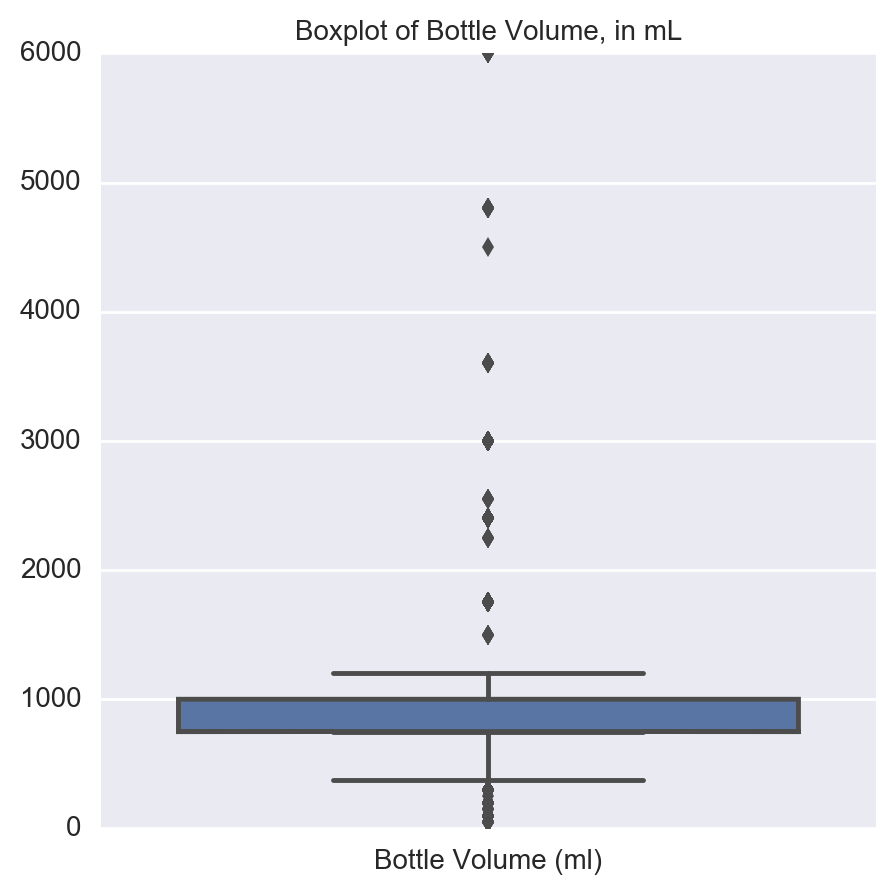

In [27]:
#check for presence of outliers in bottle volumn column
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(data=iowa[['Bottle Volume (ml)']], ax=ax, notch=True)

ax.set_title('Boxplot of Bottle Volume, in mL', fontsize=10)

plt.show()

In [28]:
#remove rows where bottle volume is more than 2 standard deviations away from the mean
iowa = iowa[np.abs(iowa['Bottle Volume (ml)'] - iowa['Bottle Volume (ml)'].mean()) <= (2*iowa['Bottle Volume (ml)'].std())]

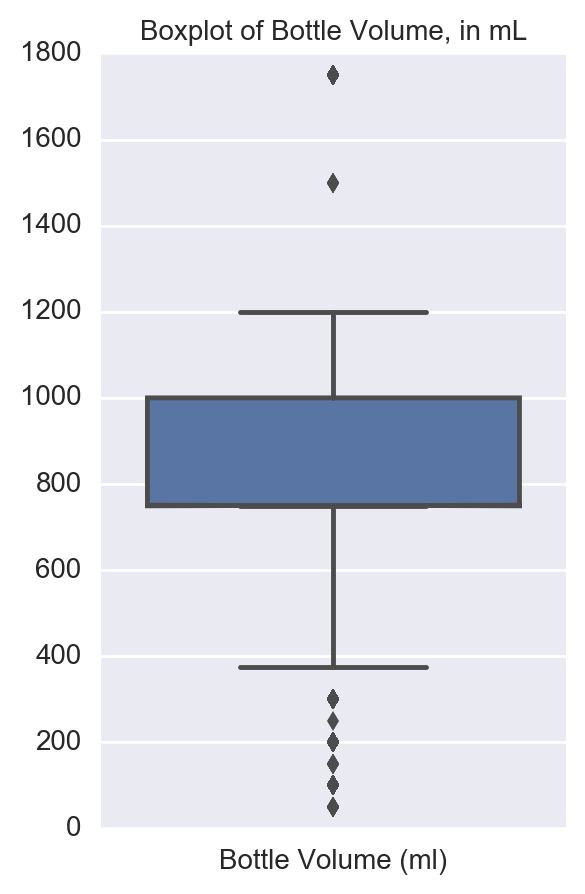

In [29]:
#re-plot distribution of bottle volume
fig = plt.figure(figsize=(3,5))
ax = fig.gca()

ax = sns.boxplot(data=iowa[['Bottle Volume (ml)']], ax=ax, notch=True)

ax.set_title('Boxplot of Bottle Volume, in mL', fontsize=10)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [30]:
#investigate counts of 2015 sales by month
iowa['Year'] = iowa['Date'].map(lambda x: x.year)
iowa['Month'] = iowa['Date'].map(lambda x: x.month)
iowa['YearMonth'] = iowa['Date'].map(lambda x: 100*x.year + x.month)
iowa[iowa['Year'] == 2015].YearMonth.value_counts()

201512    22962
201506    20440
201509    18497
201507    18346
201508    17894
201503    17866
201504    17837
201511    17620
201510    17282
201505    16826
201501    15928
201502    15716
Name: YearMonth, dtype: int64

In [ ]:
#This cell is supposed to filter the dataframe to stores with at least one transaction in Jan 2015 and at least
#one transaction in Dec 2015.  The cell does not finish running though.

def sales_all_year(store):
    all_year = ((((iowa['Store Number'] == store) & (iowa.Year == 2015) & (iowa.Month == 1)).any()) & 
            (((iowa['Store Number'] == store) & (iowa.Year == 2015) & (iowa.Month == 12)).any()))
    return all_year

iowa = iowa[iowa['Store Number'].apply(sales_all_year)]

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [31]:
iowa[iowa['Year'] == 2015].groupby(['Store Number'])['Sale (Dollars)'].sum()

Store Number
2106    146326.22
2113      9310.22
2130    111826.85
2152      7721.08
2178     24324.18
2190    121421.58
2191    125048.91
2200     22766.97
2205     24636.81
2228     17417.49
2233     29553.34
2238     11762.56
2248     67296.80
2285     76793.37
2290     56380.69
2327     10245.14
2353     53911.39
2367      5010.83
2413     90065.02
2445      7189.48
2448     17732.42
2459      7352.33
2460     33508.86
2465     25742.64
2475     10681.07
2478     19840.65
2487     28900.96
2498      2259.67
2500    148465.86
2501    144132.46
          ...    
5180      2231.16
5181       963.04
5182      2612.94
5183       916.80
5185      1077.39
5186       298.86
5187      4149.95
5188      1887.73
5189       604.20
5190      1161.73
5191       303.90
5192        90.00
5193       139.50
5196       682.85
5198      3985.06
5199      2046.22
5201       289.78
5203       928.49
5204       790.44
5205        39.02
5206       500.90
5207      3153.37
5212       504.54
5213       180.

### 5.2 Calculate the profit each store is making in 2015.


In [32]:
#create a column with total cost (bottles sold * state bottle cost)
iowa["Total Cost"] = iowa["Bottles Sold"] * iowa["State Bottle Cost"]
#create a column with profit for each sale
iowa["Profit"] = iowa["Sale (Dollars)"] - iowa["Total Cost"]
#calculate annual profit for each store
iowa[iowa['Year'] == 2015].groupby(['Store Number'])['Profit'].sum()

Store Number
2106    48838.08
2113     3109.04
2130    37310.34
2152     2587.53
2178     8165.70
2190    40528.57
2191    41729.53
2200     7638.61
2205     8229.27
2228     5829.48
2233     9866.66
2238     3922.65
2248    22456.07
2285    25676.43
2290    18837.79
2327     3417.67
2353    18157.09
2367     1670.97
2413    30102.82
2445     2399.19
2448     5921.75
2459     2459.08
2460    11256.28
2465     8600.10
2475     3562.92
2478     6615.42
2487     9703.57
2498      759.42
2500    49582.89
2501    48196.97
          ...   
5180      746.70
5181      321.19
5182      871.44
5183      305.76
5185      359.31
5186       99.72
5187     1385.59
5188      629.52
5189      201.42
5190      387.42
5191      101.34
5192       30.00
5193       46.53
5196      227.70
5198     1330.21
5199      684.04
5201       96.65
5203      309.69
5204      263.78
5205       13.34
5206      167.02
5207     1052.83
5212      168.28
5213       60.00
5215       18.68
9001     9403.68
9002    12574.08
9

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [33]:
#create a column with profit per gallon for each sale
iowa["Profit Per Gallon"] = iowa["Profit"] / iowa["Volume Sold (Gallons)"]
#find 10 counties with largest average profit per gallon
print iowa[iowa['Year'] == 2015].groupby(['County'])['Profit Per Gallon'].mean().nlargest(10)

County
Polk           24.835886
Johnson        24.437382
Jefferson      24.209793
Scott          24.179243
Buena Vista    23.723326
Des Moines     23.612319
Washington     23.603376
Story          23.594513
Black Hawk     23.552965
Linn           23.499259
Name: Profit Per Gallon, dtype: float64


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [34]:
#create column with store size calculated based on volume sold in 2015
iowa["Store Size"] = iowa[iowa['Year'] == 2015].groupby(['Store Number'])['Volume Sold (Gallons)'].apply(lambda x: x.sum())
#create column with ratio of profit to store size
iowa["Profit to Size Ratio"] = iowa["Profit"] / iowa["Store Size"]

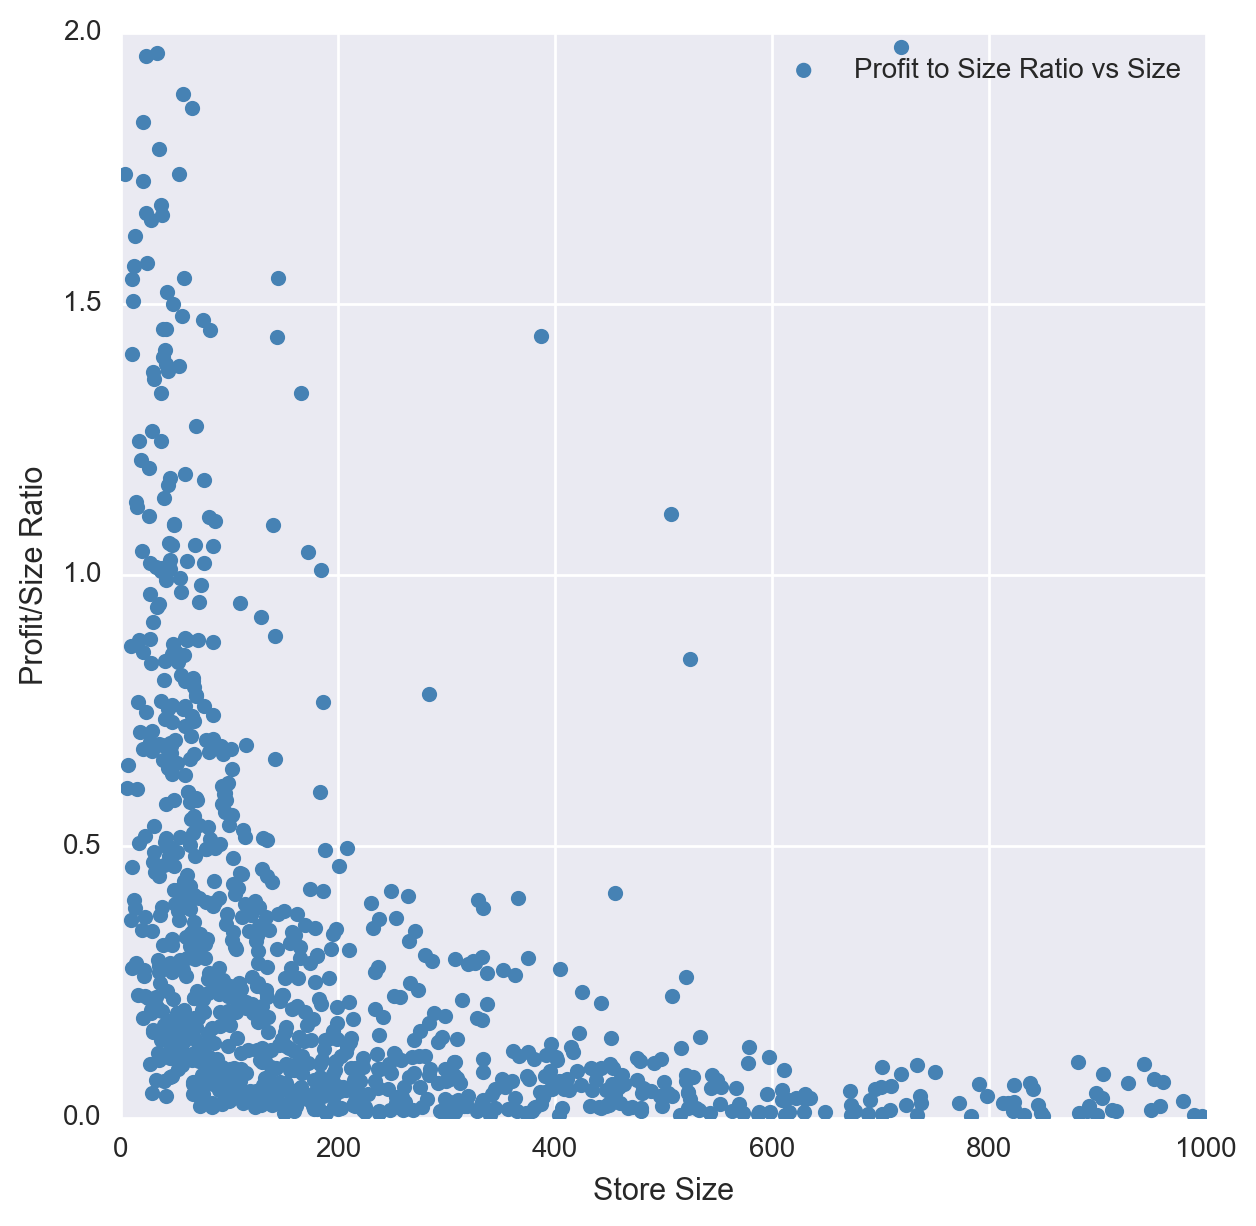

In [35]:
#plot profit to store size ratio against store size
fig, ax = plt.subplots(figsize=(7,7))
xvals = iowa[iowa['Year'] == 2015]['Store Size']
yvals = iowa[iowa['Year'] == 2015]['Profit to Size Ratio']
plt.scatter(xvals, yvals, lw=1, color='steelblue', label='Profit to Size Ratio vs Size')
ax.set_xlabel('Store Size')
ax.set_ylabel('Profit/Size Ratio')
plt.ylim(0,2)
plt.xlim(0,1000)
plt.legend(loc='upper right')
plt.show()

Conclusion: According to this plot, there is an appearance that the ratio diminishes as store size increases, but the data is really bunched up together to make a definitive statement.

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [36]:
iowa['Category Name'].unique()

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [37]:
def alc_cats(value):
    spirits = ['VODKA','GIN','TEQUILA','WHISK','RUM','BRAND','BOURBON']
    liqueurs = ['AMARETTO','SCHNAPPS','LIQUEUR','CREME']
    if any(s in str(value) for s in spirits):
        return 'Spirits'
    elif any(l in str(value) for l in liqueurs):
        return 'Liqueurs'
    else:
        return 'Other'
    
iowa['Binned Category'] = iowa['Category Name'].apply(alc_cats)
iowa['Binned Category'].value_counts()

Spirits     220249
Liqueurs     34656
Other        14288
Name: Binned Category, dtype: int64

### 5.7 Do relationships exist between the broader liquor type and profit?

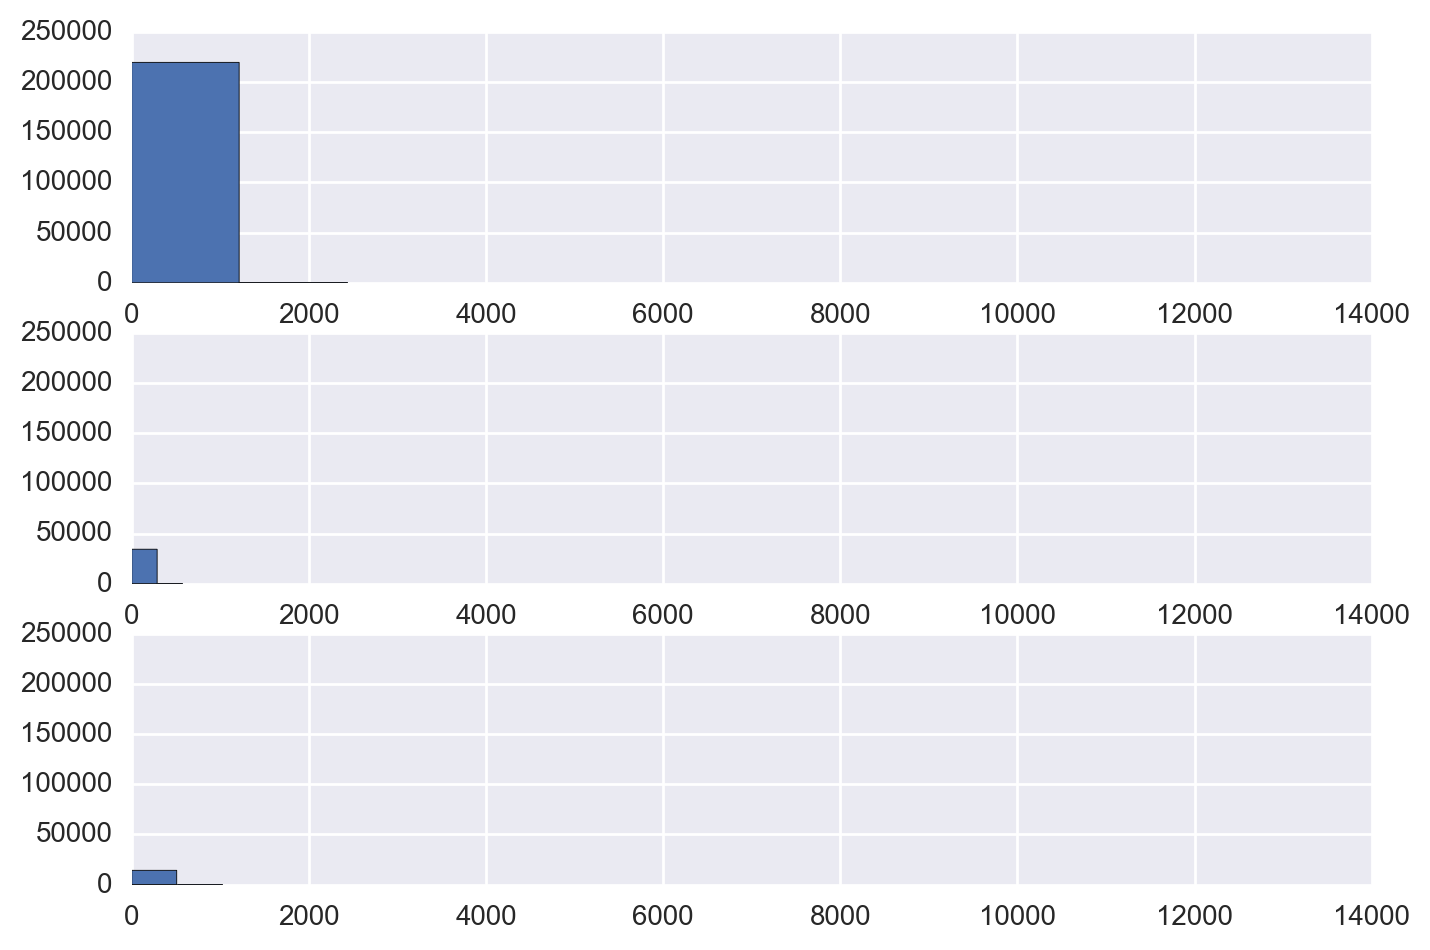

In [38]:
sprt_prof = iowa[iowa['Binned Category'] == 'Spirits']
liqr_prof = iowa[iowa['Binned Category'] == 'Liqueurs']
othr_prof = iowa[iowa['Binned Category'] == 'Other']

ax1 = plt.subplot(311)
plt.hist(sprt_prof['Profit'])

ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
plt.hist(liqr_prof['Profit'])

ax1 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.hist(othr_prof['Profit'])

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?